# Part II - Ford GoBike System Data Visualization
## by Augustine Omoregbee

## Investigation Overview


In this presentation, I will illustrate how user characteristics such as age, gender and purpose in the Ford GoBike System Date, influence bike usage in the forms of trip duration, start time, start day, distance and bike sharing.


## Dataset Overview

The Ford GoBike System dateset contains information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

Specific information being provided in the dataset include bike ID, user type, member gender, member birth year, start station ID and coordinates, end station ID and coordinates, trip start time, trip end time and trip duration.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('ford_gobike_master.csv')

## Distribution of Bike User Type.
Majority of the bike users are subscribers.

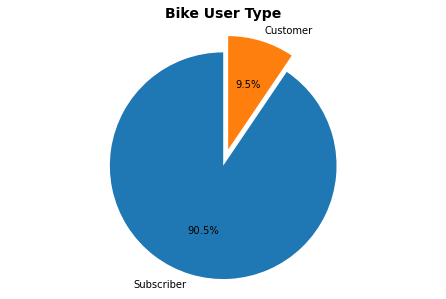

In [3]:
# obtain count for each user type
type_count = (df['user_type']).value_counts()
type_count

# make a pie chart plot of the user type
plt.pie(type_count, labels = ['Subscriber', 'Customer'], startangle = 90, explode=(0, .15), autopct = '%1.1f%%');
plt.axis('equal')
plt.title('Bike User Type', size = 14, weight = 'bold')
plt.subplots_adjust(bottom = 0, top = 0.93, left = 0.0, right = 1.0);

## Hourly Trip Activity.
The peak hours of bike usage are 8:00 AM and 5:00 PM. These hours correspond to mornings and late noons.

In [4]:
def bar_plot(df, var_count, var_name, x_label, y_label, title, order = None):
    """
    This function makes a bar plot of a specified variable.
    
    Parameters:
        df: DataFrame of interest
        var_count (String): Variable count
        order (String): Variable order
        var_name (string): Variable to be plotted
        x_label (string): horizontal axis label
        y_label (string): vertical axis label.
        title (string): plot title.  
    """
    # order the unique values by count
    var_count = df[var_name].value_counts()

    # adjust figure size
    plt.figure(figsize = [11, 5])
    # set base color
    base_color = sb.color_palette()[0]
    # make a bar plot of the variable
    sb.countplot(data = df, x = var_name, color = base_color, order = order)
    # add x label and format it
    plt.xlabel(x_label, size = 12, weight = 'bold')
    # add y label and format it
    plt.ylabel(y_label, size = 12, weight = 'bold')
    # add title and format it 
    plt.title(title, size = 14, weight = 'bold');

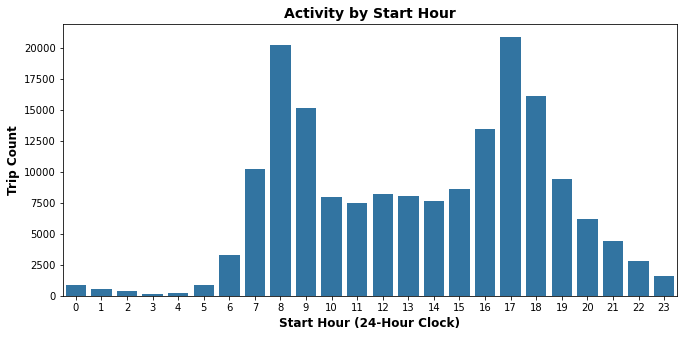

In [6]:
# make a bar plot of the start hour variable
bar_plot(df, 'hour_count', 'start_hour', 'Start Hour (24-Hour Clock)', 'Trip Count', 'Activity by Start Hour');

## Daily Trip Activity
Thursdays are the most active start days, while Saturdays are the least active days.

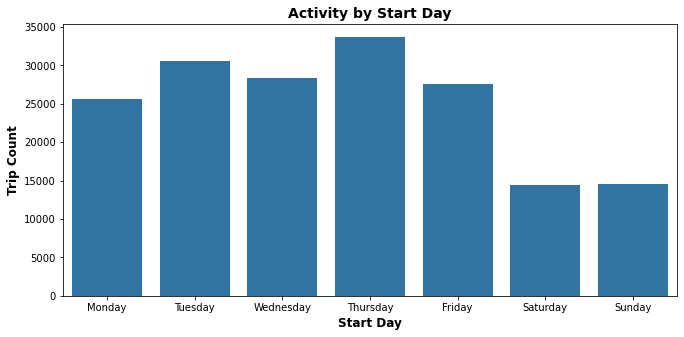

In [8]:
# set horiontal axis label order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
# make a bar plot of the start day variable
bar_plot(df, 'day_count', 'start_day', 'Start Day', 'Trip Count', 'Activity by Start Day', order = day_order);

## Age Distribution of Bike Users
Most bike users are between the ages of 25 and 35 years.

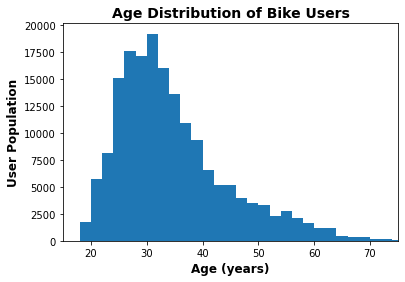

In [9]:
# set the bin edges
bin_edges = np.arange(0, df['age'].max() +2, 2)
# make a histogram plot of the age variable
plt.hist(data = df, x = 'age', bins = bin_edges)
# add x label and format it
plt.xlabel('Age (years)', size = 12, weight = 'bold')
# add y label and format it
plt.ylabel('User Population', size = 12, weight = 'bold')
# add title and format it.
plt.title('Age Distribution of Bike Users', size = 14, weight = 'bold')
# set horizontal axis limit
plt.xlim([15, 75]);

## Relationship Between Trip Start Hour and Day of the Week.
On weekdays, the peak hours for trips are 8:00 AM and 5:00 PM. But on weekends, the peak start hour is by 12:00 noon.

In [10]:
def bi_plot(plot_type, df, x_data, y_data, order = None):
    """
    This function makes a either a violin or box plot between to specified variables.
    
    Parameters:
        df: DataFrame of interest
        plot_type: Plot type, either violin plot (sb.violinplot) or box plot (sb.boxplot)
        x_data (string): Variable on the x_axis.
        y_data (string): Variable on the y_axis.
        
    """
    plot_type(data = df, x = x_data, y = y_data, color = sb.color_palette()[0], order = order)
    # tidy up labels after plotting
    x_data = x_data.replace('_', ' ') # replace underscore symbol with space
    y_data = y_data.replace('_', ' ') # replace underscore symbol with space
    # add x label and format it
    plt.xlabel(x_data.title(), size = 12, weight = 'bold')
    # add y label and format it
    plt.ylabel(y_data.title(), size = 12, weight = 'bold')
    # add title and format it
    plt.title(f'Distribution of {y_data} by {x_data}'.title(), size = 14, weight = 'bold')

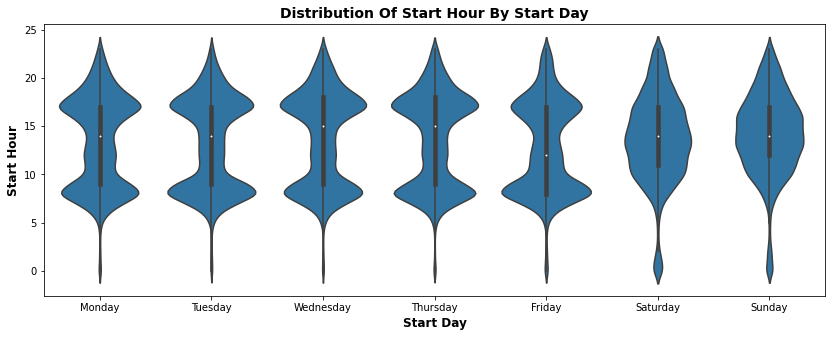

In [13]:
# set figure size
plt.figure(figsize = [14, 5])
# make the desired plot
bi_plot(sb.violinplot, df, 'start_day', 'start_hour', order = day_order);

## Pairwise Correlation of the Numerical Variables.
A very weak correlation exists amongst all unique pairs of numeric variables.

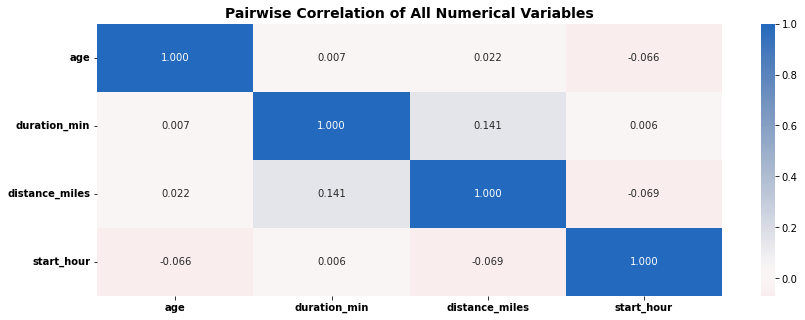

In [12]:
# make a list of the numerical variables
numeric_vars = ['age', 'duration_min', 'distance_miles', 'start_hour']

# set figure size
plt.figure(figsize = [14, 5])
# make a plot of the correlation
sb.heatmap(df[numeric_vars].corr(), annot = True, fmt = '.3f', cmap = 'vlag_r', center = 0)
# format labels
plt.xticks(weight = 'bold')
plt.yticks(weight = 'bold')
# set title and format it
plt.title('Pairwise Correlation of All Numerical Variables', size = 14, weight = 'bold');